# Duygu Durum Analizi

## Kütüphaneler

In [4]:
pip install afinn

Note: you may need to restart the kernel to use updated packages.


In [108]:
# Import libraries
import re  # For regular expressions
import nltk  # For text functions
import matplotlib.pyplot as plt  # For plotting
import pandas as pd  # For dataframes
from afinn import Afinn  # For sentiment values

# Import corpora and functions from NLTK
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize

# Download data for NLTK
nltk.download('stopwords', quiet=True)
nltk.download('opinion_lexicon', quiet=True)
nltk.download('punkt', quiet=True)

# Use Matplotlib style sheet
plt.style.use('ggplot')

## Veri Seti

In [109]:
df = pd.read_excel('data/medium.xlsx',header=None,names=["text"])
df.head()

,text
0,"If you do what you love, you won't have worked..."
1,"At the end of the 1980s, I was preparing for t..."
2,"The computer, in which 64 KB RAM and cassette ..."
3,My adventure of preparing for the university e...
4,"Unfortunately, I couldn't get into Computer En..."


In [110]:
df['line'] = range(1, len(df) + 1)

df.head()

,text,line
0,"If you do what you love, you won't have worked...",1
1,"At the end of the 1980s, I was preparing for t...",2
2,"The computer, in which 64 KB RAM and cassette ...",3
3,My adventure of preparing for the university e...,4
4,"Unfortunately, I couldn't get into Computer En...",5


## Tokenization

In [111]:
def clean_text(text):
    text = text.lower()  
    text = text.replace("'", '')
    text = re.sub(r'[^\w]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

df['text'] = df['text'].map(clean_text) 
df['text'] = df['text'].map(word_tokenize)

df.head()

,text,line
0,"[if, you, do, what, you, love, you, wont, have...",1
1,"[at, the, end, of, the, 1980s, i, was, prepari...",2
2,"[the, computer, in, which, 64, kb, ram, and, c...",3
3,"[my, adventure, of, preparing, for, the, unive...",4
4,"[unfortunately, i, couldnt, get, into, compute...",5


## Token

In [112]:
df = df.text.explode().to_frame('token')
df.head(10)

,token
0,if
0,you
0,do
0,what
0,you
0,love
0,you
0,wont
0,have
0,worked


## Token Frekansları

In [113]:
df.token.value_counts().head(10)

the     68
i       59
and     31
in      28
of      26
data    23
to      23
my      22
with    21
a       21
Name: token, dtype: int64

## Stop Words

In [114]:
stopwords = set(stopwords.words('english'))
df = df[~df.token.isin(stopwords)]

## Token Frekansları

In [115]:
df.token.value_counts().head(10)

data             23
science          13
years             7
time              7
world             7
engineering       6
end               5
university        5
professional      5
environmental     5
Name: token, dtype: int64

## Duygu Durum Sınıflandırması

In [117]:
sentiment_lexicon = {
    **{w: 'Pozitif' for w in opinion_lexicon.positive()},
    **{w: 'Negatif' for w in opinion_lexicon.negative()}
}

df['duygu_durum'] = df['token'].map(sentiment_lexicon)
df = df[~df.duygu_durum.isna()]

df.head(10)

,token,duygu_durum
0,love,Pozitif
0,worked,Pozitif
2,great,Pozitif
3,ready,Pozitif
3,favorite,Pozitif
3,classic,Pozitif
4,unfortunately,Negatif
4,attraction,Pozitif
4,worked,Pozitif
4,struggle,Negatif


## Duygu Durum Frekansları

In [118]:
df.token.value_counts().head(10)

love             5
work             4
worked           3
proud            2
advanced         2
scared           1
support          1
extraordinary    1
successfully     1
ignore           1
Name: token, dtype: int64

## Duygu Durum Özeti

In [123]:
summary_df = df.duygu_durum.value_counts().to_frame('Frekans')
summary_df['Oran'] = summary_df['Frekans'] / summary_df.Frekans.sum()
summary_df.round(3)

,Frekans,Oran
Pozitif,39,0.886
Negatif,5,0.114


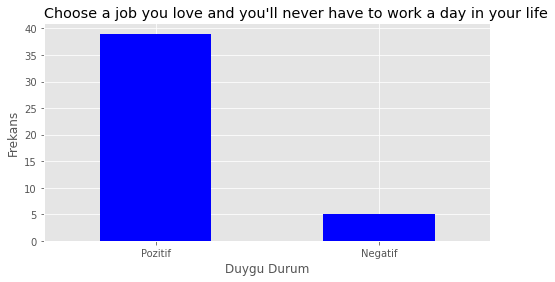

In [127]:
summary_df.Frekans.plot.bar(legend=False, figsize=(8, 4), grid=True, color='blue')
plt.xlabel('Duygu Durum')
plt.ylabel('Frekans')
plt.title('Choose a job you love and you\'ll never have to work a day in your life', loc='left')
plt.savefig("data/Frequency.png")
plt.xticks(rotation=0);